In [1]:
import pandas as pd  # Importing the pandas library, used for data manipulation and analysis.
import numpy as np  # Importing the numpy library, typically used for numerical operations.
import seaborn as sns  # Importing the seaborn library, used for statistical data visualization.
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot library for creating static, interactive, and animated visualizations.
from sklearn.model_selection import train_test_split  # Importing a function to split data into training and testing sets.
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Importing tools for encoding labels and scaling data.
from sklearn.metrics import mean_squared_error, r2_score  # Importing metrics for evaluating model performance.
from sklearn.neighbors import KNeighborsRegressor  # Importing the K-nearest neighbors regression model.
from sklearn.svm import SVR  # Importing the support vector regression model.
from sklearn.linear_model import LinearRegression  # Importing the linear regression model.
from sklearn.ensemble import RandomForestRegressor  # Importing the random forest regression model.
from sklearn.tree import DecisionTreeRegressor  # Importing the decision tree regression model.
import warnings  # Importing the warnings library to control or suppress warning messages.
warnings.filterwarnings("ignore")  # Suppressing warnings to keep output clean.

# Load an Excel file into a pandas DataFrame
df = pd.read_excel("bitirme.xlsx")  # Read the data from the specified Excel file into a DataFrame.

# Adjust the column names
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Set the column names to more meaningful names in Turkish.


In [2]:
label_encoder = LabelEncoder()  # Create an instance of the LabelEncoder, used for encoding categorical values as integers.

# Encode the "Arac Modeli" column with unique integer values
df["Arac Modeli"] = label_encoder.fit_transform(df["Arac Modeli"])  
# This transformation maps each unique car model to an integer, making it suitable for machine learning algorithms.

# Encode the "Batarya Kapasitesi" column
df["Batarya Kapasitesi"] = label_encoder.fit_transform(df["Batarya Kapasitesi"])  
# Similarly, convert battery capacity (which might be categorical) into numerical representation.

# Encode the "Surus Yeri" column
df["Surus Yeri"] = label_encoder.fit_transform(df["Surus Yeri"])  
# This transformation converts the driving location into unique integer values.

# Encode the "Surus Stili" column
df["Surus Stili"] = label_encoder.fit_transform(df["Surus Stili"])  
# This maps different driving styles to unique integers, facilitating their use in models.

# Separate the features (X) and targets (y) for modeling
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  
# These columns represent the features used for training the model.

y = df[["-10 C", "0 C", "10 C", "20 C", "45 C"]]  # Extract the target/output variables from the DataFrame.
# These are the columns representing various temperature conditions, which are the targets for regression.


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The `train_test_split` function splits the dataset into training (80%) and testing (20%) sets.
# `random_state=42` ensures that the split is reproducible. This means that the data will be split the same way every time the code is run with this seed.

# Normalize the features with a StandardScaler
scaler = StandardScaler()  # Create an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance.
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it.
X_test_scaled = scaler.transform(X_test)  # Transform the testing data with the same scaler.
# Standardizing the features ensures that they are on a similar scale, which can help with model performance, especially for distance-based algorithms.

# Train models with different algorithms and evaluate their results
models = {
    "KNN": KNeighborsRegressor(n_neighbors=3),  # K-Nearest Neighbors regressor with 3 neighbors.
    "SVM": SVR(),  # Support Vector Regression with default settings.
    "LinearRegression": LinearRegression(),  # Simple linear regression model.
    "RandomForest": RandomForestRegressor(n_estimators=100),  # Random Forest regressor with 100 trees.
    "DecisionTree": DecisionTreeRegressor()  # Decision Tree regressor with default settings.
}
# Create a dictionary of different regression models to train and compare their performance.

results = {}  # Initialize an empty dictionary to store the results of the models.
# This will be used to collect and store the performance metrics of each model for comparison.


In [4]:
# Rearrange for proper structuring of data
temperature_columns = ["-10 C", "0 C", "10 C", "20 C", "45 C"]  # List of temperature columns to work with.
results = {}  # Dictionary to store the results of the models.

# Train the models and calculate the results for each target column
for temp_col in temperature_columns:  # Loop through each temperature column in the dataset.
    for model_name, model in models.items():  # Loop through each model in the dictionary of models.
        # Train the model with the scaled training set
        model.fit(X_train_scaled, y_train[temp_col])  # Fit the model on the training data for the current temperature column.

        # Make predictions on the scaled testing set
        y_pred = model.predict(X_test_scaled)  # Use the model to predict the target values for the test set.

        # Calculate error metrics
        mse = mean_squared_error(y_test[temp_col], y_pred)  # Calculate the mean squared error between the actual and predicted values.
        r2 = r2_score(y_test[temp_col], y_pred)  # Calculate the R2 score to measure the proportion of variance explained by the model.

        # Save the results in the dictionary
        if model_name not in results:  # If the model name is not already in the results dictionary...
            results[model_name] = {}  # Initialize a nested dictionary for this model.

        results[model_name][temp_col] = {  # Store the MSE and R2 for this model and temperature column.
            "MSE": mse,
            "R2": r2
        }

# Display the results
results_df = pd.DataFrame(results).T  # Convert the results dictionary to a DataFrame for easier viewing and transpose it to have models as rows and temperature columns as columns.
print("Model Results:\n", results_df)  # Print the DataFrame to display the results.


Model Results:
                                                               -10 C  \
KNN               {'MSE': 6738.362745098038, 'R2': 0.44012055190...   
SVM               {'MSE': 10816.142683163613, 'R2': 0.1013045416...   
LinearRegression  {'MSE': 8295.265733220176, 'R2': 0.31076005014...   
RandomForest      {'MSE': 3979.1292411764716, 'R2': 0.6693807134...   
DecisionTree      {'MSE': 5787.85294117647, 'R2': 0.519096844001...   

                                                                0 C  \
KNN               {'MSE': 4006.2026143790854, 'R2': -0.050372770...   
SVM               {'MSE': 3686.2054600583356, 'R2': 0.0335262056...   
LinearRegression  {'MSE': 3860.214495197152, 'R2': -0.0120966371...   
RandomForest      {'MSE': 546.8679518749999, 'R2': 0.85661853356...   
DecisionTree      {'MSE': 955.4705882352941, 'R2': 0.74948838451...   

                                                               10 C  \
KNN               {'MSE': 5146.918300653595, 'R2': -0.36825

In [5]:
import tensorflow as tf  # Import the TensorFlow library, a popular deep learning framework.
from tensorflow import keras  # Import the Keras module, a high-level API for building neural networks.
from tensorflow.keras import layers  # Import the layers module to create various types of layers in a neural network.

# Create a multilayer artificial neural network
model = keras.Sequential([  # Use the Sequential API to create a simple, linear stack of layers.
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First dense layer with 64 units, ReLU activation, and input shape matching the number of features.
    layers.Dense(64, activation='relu'),  # Second dense layer with 64 units and ReLU activation function.
    layers.Dense(5)  # Output layer with 5 units, corresponding to the 5 target variables.
])
# The model has an input layer, two hidden layers with ReLU activation for non-linearity, and an output layer with 5 units to match the target columns.


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Use the Adam optimizer, mean squared error (MSE) as the loss function, and mean absolute error (MAE) as a metric.
# The Adam optimizer is a popular choice for deep learning because it adjusts learning rates during training. MSE is a common loss function for regression problems.

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)
# Train the neural network for 50 epochs with a batch size of 16. The validation_split parameter reserves 20% of the training data for validation during training.
# This helps monitor the model's performance and avoid overfitting by checking its performance on unseen validation data.

# Evaluate the model's performance
y_pred = model.predict(X_test_scaled)  # Make predictions using the trained model on the test data.

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')  # Calculate the mean squared error for each of the 5 output variables.
r2 = r2_score(y_test, y_pred, multioutput='raw_values')  # Calculate the R2 score for each of the 5 output variables.
# The multioutput='raw_values' parameter allows the calculation of MSE and R2 separately for each target variable, rather than averaging across all outputs.


Epoch 1/50
7/7 [==============================] - 0s 21ms/step - loss: 173678.5312 - mae: 403.0706 - val_loss: 169549.8125 - val_mae: 398.9570
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 173513.5938 - mae: 402.8640 - val_loss: 169375.6719 - val_mae: 398.7391
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 173335.0469 - mae: 402.6414 - val_loss: 169172.0938 - val_mae: 398.4852
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 173127.2188 - mae: 402.3785 - val_loss: 168921.8594 - val_mae: 398.1740
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 172859.1250 - mae: 402.0417 - val_loss: 168605.1875 - val_mae: 397.7786
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 172516.5469 - mae: 401.6144 - val_loss: 168193.2656 - val_mae: 397.2633
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 172081.0781 - mae: 401.0646 - val_loss: 167662.5938 - val_mae: 396.5984
Epoch

In [7]:
print("MSE:", mse)
print("R2:", r2)

MSE: [ 7267.81037948  4601.11165089  6607.1128184  13464.04186475
  9393.17995047]
R2: [ 0.39612962 -0.20634997 -0.7564362   0.33141324 -0.47187894]


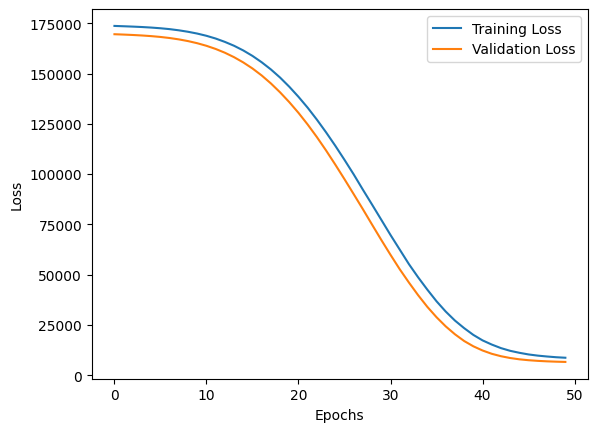

In [8]:
# Plot the loss curves for training and validation
plt.plot(history.history['loss'], label='Training Loss')  # Plot the training loss for each epoch.
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss for each epoch.
# The `history.history` dictionary contains the loss and other metrics for each epoch during training.

plt.xlabel('Epochs')  # Label the x-axis as 'Epochs' to represent the number of training iterations.
plt.ylabel('Loss')  # Label the y-axis as 'Loss' to represent the loss values (mean squared error in this case).

plt.legend()  # Display the legend to differentiate between the training and validation loss.
plt.show()  # Display the plot to visualize how the loss changes over the epochs.

# This plot helps in assessing model training and determining if overfitting is occurring. If the validation loss starts increasing while training loss decreases, it can indicate overfitting.


In [9]:
import tensorflow as tf  # Import TensorFlow library for deep learning tasks.
from tensorflow import keras  # Import the Keras module for building neural networks.
from tensorflow.keras import layers  # Import the layers module to construct the neural network.

# Check input dimensions
input_shape = (X_train_scaled.shape[1],)  # Correct input shape for 1D Convolutional Neural Networks (CNN).

# Convolutional Neural Networks (CNN) model
cnn_model = keras.Sequential([  # Create a sequential model to stack layers in a linear fashion.
    layers.Conv1D(16, kernel_size=1, activation='relu', input_shape=(1, X_train_scaled.shape[1])),  # 1D convolutional layer with 16 filters, a kernel size of 1, and ReLU activation.
    layers.Conv1D(16, kernel_size=1, activation='relu'),  # Another 1D convolutional layer with 16 filters and ReLU activation.
    layers.Flatten(),  # Flatten the output of the convolutional layers to convert it into a single dimension.
    layers.Dense(5)  # Output dense layer with 5 units, representing the 5 target variables.
])
# This simple CNN has two convolutional layers, a flattening layer, and a dense output layer with 5 units for regression.

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Compile with Adam optimizer, MSE as the loss function, and MAE as the metric.

# Reshape the data properly
X_train_reshaped = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])  # Reshape training data to include the new dimension for the 1D CNN.
X_test_reshaped = X_test_scaled.reshape(-1, 1, X_train_scaled.shape[1])  # Reshape test data in the same way.

# Train the model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16, validation_split=0.2)
# Train the CNN model for 50 epochs with a batch size of 16. The validation_split parameter splits off 20% of the training data for validation during training.

# Examine the training results
cnn_results = cnn_history.history['val_loss'][-1]  # Retrieve the last value of validation loss from the training history.

print("CNN Validation Loss:", cnn_results)  # Display the validation loss to assess the model's performance.


Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 173660.6250 - mae: 403.0573 - val_loss: 169627.0938 - val_mae: 399.0587
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 173625.2500 - mae: 403.0139 - val_loss: 169590.3594 - val_mae: 399.0135
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 173588.8750 - mae: 402.9692 - val_loss: 169550.5781 - val_mae: 398.9646
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 173548.4688 - mae: 402.9190 - val_loss: 169506.3750 - val_mae: 398.9103
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 173504.1875 - mae: 402.8645 - val_loss: 169456.2656 - val_mae: 398.8486
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 173451.0781 - mae: 402.8008 - val_loss: 169399.7031 - val_mae: 398.7790
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 173391.5469 - mae: 402.7276 - val_loss: 169333.1875 - val_mae: 398.6973
Epoch

2/2 [==============================] - 0s 2ms/step
CNN R²: [ -4.69423086 -29.61902029 -38.21855672  -6.00570537 -22.88574985]


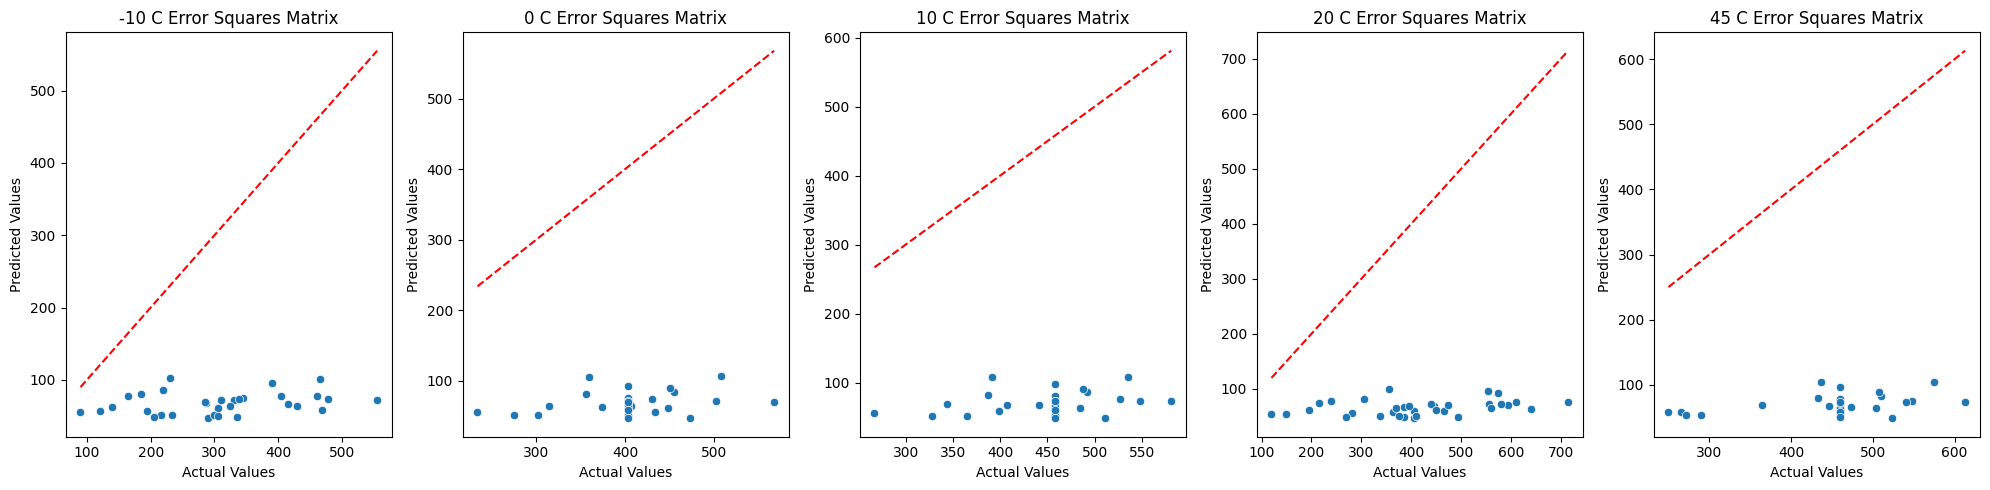

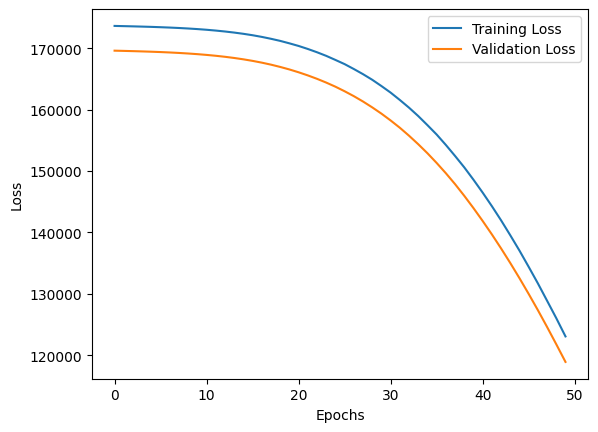

In [10]:
# After training the model, let's make predictions
y_pred = cnn_model.predict(X_test_reshaped)  # Use the trained CNN model to predict the test set.

# Calculate R²
r2_values = r2_score(y_test, y_pred, multioutput='raw_values')  # Calculate R² score for each output variable (multi-output).
print("CNN R²:", r2_values)  # Display the R² values to assess how well the model explains the variance in the target variables.

# Create scatter plots for residual analysis (Error Squares Matrix)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Create a figure with 1 row and 5 columns for plotting.
temperature_columns = ["-10 C", "0 C", "10 C", "20 C", "45 C"]  # List of the target temperature columns.

# Loop through the temperature columns and create scatter plots to compare true vs. predicted values
for idx, temp_col in enumerate(temperature_columns):  # Loop through each temperature column
    sns.scatterplot(x=y_test[temp_col], y=y_pred[:, idx], ax=axes[idx])  # Scatter plot of actual vs. predicted values for each temperature.
    axes[idx].set_title(f"{temp_col} Error Squares Matrix")  # Set the title for the plot.
    axes[idx].set_xlabel("Actual Values")  # Label the x-axis.
    axes[idx].set_ylabel("Predicted Values")  # Label the y-axis.
    # Plot a reference line (red dashed) indicating where predicted values match actual values.
    axes[idx].plot([y_test[temp_col].min(), y_test[temp_col].max()], [y_test[temp_col].min(), y_test[temp_col].max()], 'r--')

plt.tight_layout()  # Adjust the layout to prevent overlapping of plots.
plt.show()  # Display the scatter plots to visualize the error distribution.

# Plot training and validation loss curves
plt.plot(cnn_history.history['loss'], label='Training Loss')  # Plot the loss during training.
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')  # Plot the validation loss during training.
plt.xlabel('Epochs')  # Label the x-axis to indicate the number of epochs.
plt.ylabel('Loss')  # Label the y-axis to indicate the loss value (MSE).
plt.legend()  # Add a legend to distinguish between training and validation loss.
plt.show()  # Display the loss curves to visualize how the loss changed over the epochs.


In [11]:
# New temperature degrees for interpolation
new_temperatures = [-15, -5, 5, 15, 25, 30, 35, 40, 50]  # List of new temperature values to interpolate predictions for.

# Use the trained model to make new predictions
X_new = pd.DataFrame({  # Create a new DataFrame with the same structure as the original features.
    "Arac Modeli": [0],  # For example, encoding for "Ford Van"
    "Batarya Kapasitesi": [2],  # Example encoding for battery capacity, e.g., "Ford Van"
    "Surus Yeri": [0],  # Example encoding for "Urban"
    "Surus Stili": [0]  # Example encoding for "AC off"
})

# Scale the new data
X_new_scaled = scaler.transform(X_new)  # Scale the new data to match the scaling used during model training.

# Make predictions
y_pred = model.predict(X_new_scaled)  # Use the trained model to predict the outcomes for the new data.

# Interpolate the predictions to match the new temperature degrees
interpolated_predictions = np.interp(
    new_temperatures,  # New temperature values for which to interpolate predictions.
    [-10, 0, 10, 20, 45],  # Original temperature values from the trained model.
    y_pred[0]  # The first row of predictions, as it's one observation.
)
# `np.interp` linearly interpolates between given values, allowing us to estimate outcomes for new temperature degrees.

# Display the interpolated predictions for the new temperature degrees
for temp, range_value in zip(new_temperatures, interpolated_predictions):  # Loop through the new temperatures and interpolated predictions.
    print(f"Temperature: {temp}°C, Predicted Range: {range_value:.2f} km")
# This prints out the interpolated predictions for each new temperature degree, showing the estimated vehicle range.


1/1 [==============================] - 0s 17ms/step
Temperature: -15°C, Predicted Range: 437.31 km
Temperature: -5°C, Predicted Range: 473.34 km
Temperature: 5°C, Predicted Range: 530.66 km
Temperature: 15°C, Predicted Range: 539.41 km
Temperature: 25°C, Predicted Range: 528.63 km
Temperature: 30°C, Predicted Range: 530.39 km
Temperature: 35°C, Predicted Range: 532.15 km
Temperature: 40°C, Predicted Range: 533.91 km
Temperature: 50°C, Predicted Range: 535.67 km


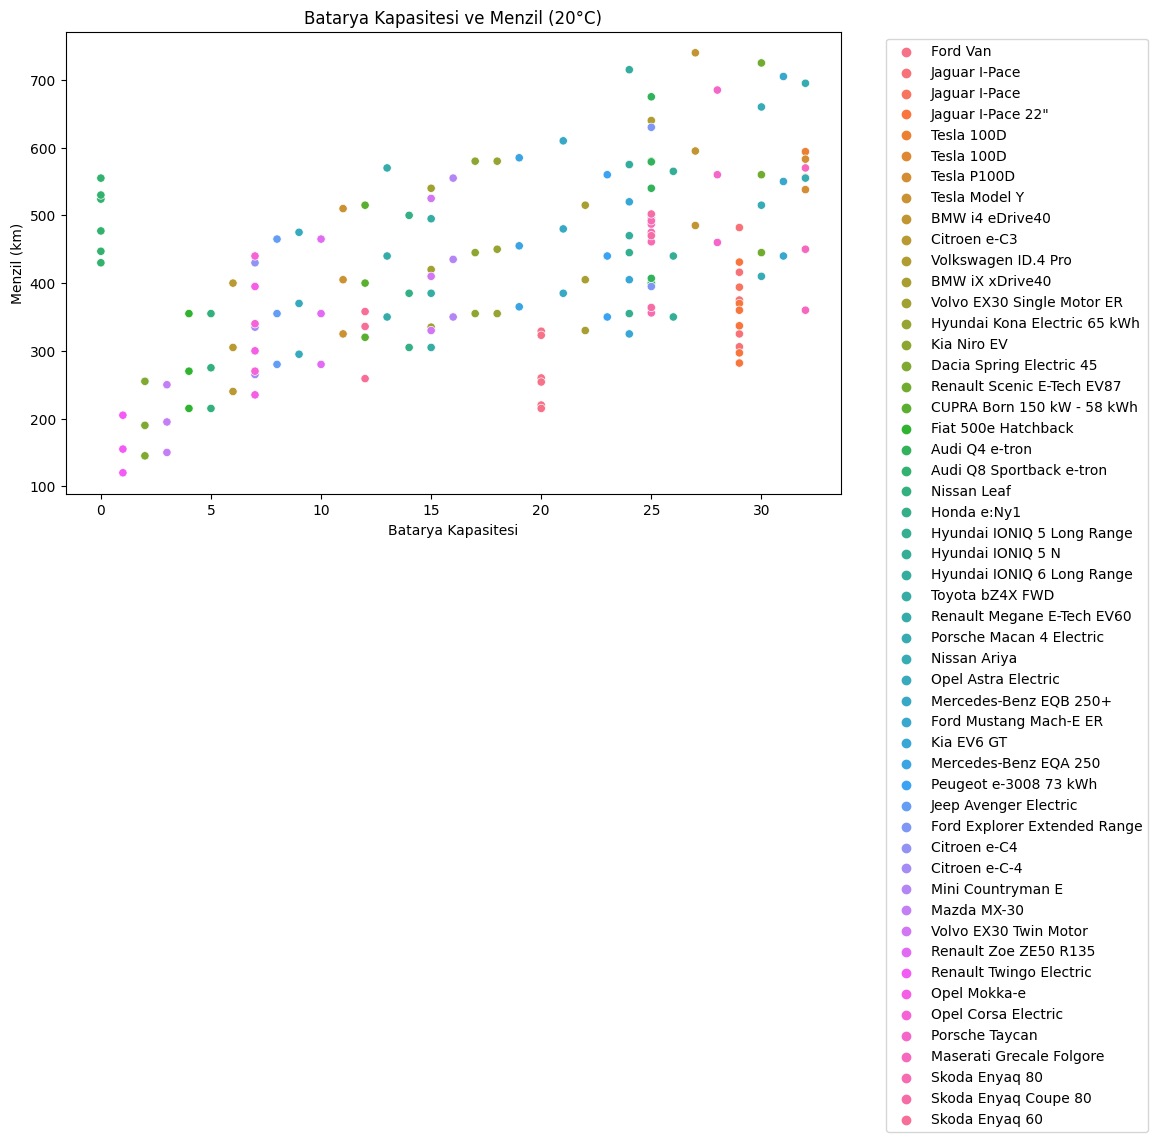

In [12]:
import pandas as pd  # Import the pandas library for data manipulation and analysis.
import seaborn as sns  # Import the seaborn library for statistical data visualization.
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot library for creating plots.
import numpy as np  # Import the numpy library for numerical operations.

# Load the Excel file
df = pd.read_excel("bitirme.xlsx")  # Read the data from the specified Excel file.

# Adjust the column names
df.columns = ["Araç Marka/Model", "Batarya Kapasitesi", "Sürüş Yeri", "Sürüş Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Set the column names to more descriptive ones.

# Convert categorical data to numerical form
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].astype('category').cat.codes  # Convert the battery capacity column to numerical codes.
df["Sürüş Yeri"] = df["Sürüş Yeri"].astype('category').cat.codes  # Convert the driving location to numerical codes.
df["Sürüş Stili"] = df["Sürüş Stili"].astype('category').cat.codes  # Convert the driving style to numerical codes.

# 1. Scatter Plot
# Visualize the relationship between battery capacity and range at 20°C
plt.figure(figsize=(10, 6))  # Create a new figure with specified size (10x6 inches).
sns.scatterplot(x="Batarya Kapasitesi", y="20 C", hue="Araç Marka/Model", data=df)  # Create a scatter plot with battery capacity on the x-axis and range at 20°C on the y-axis, using different colors for each car make/model.
plt.title("Batarya Kapasitesi ve Menzil (20°C)")  # Set the title of the plot.
plt.xlabel("Batarya Kapasitesi")  # Label the x-axis as "Battery Capacity".
plt.ylabel("Menzil (km)")  # Label the y-axis as "Range (km)".
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position to avoid overlapping with the plot.
plt.show()  # Display the scatter plot to visualize the relationship between battery capacity and range at 20°C.


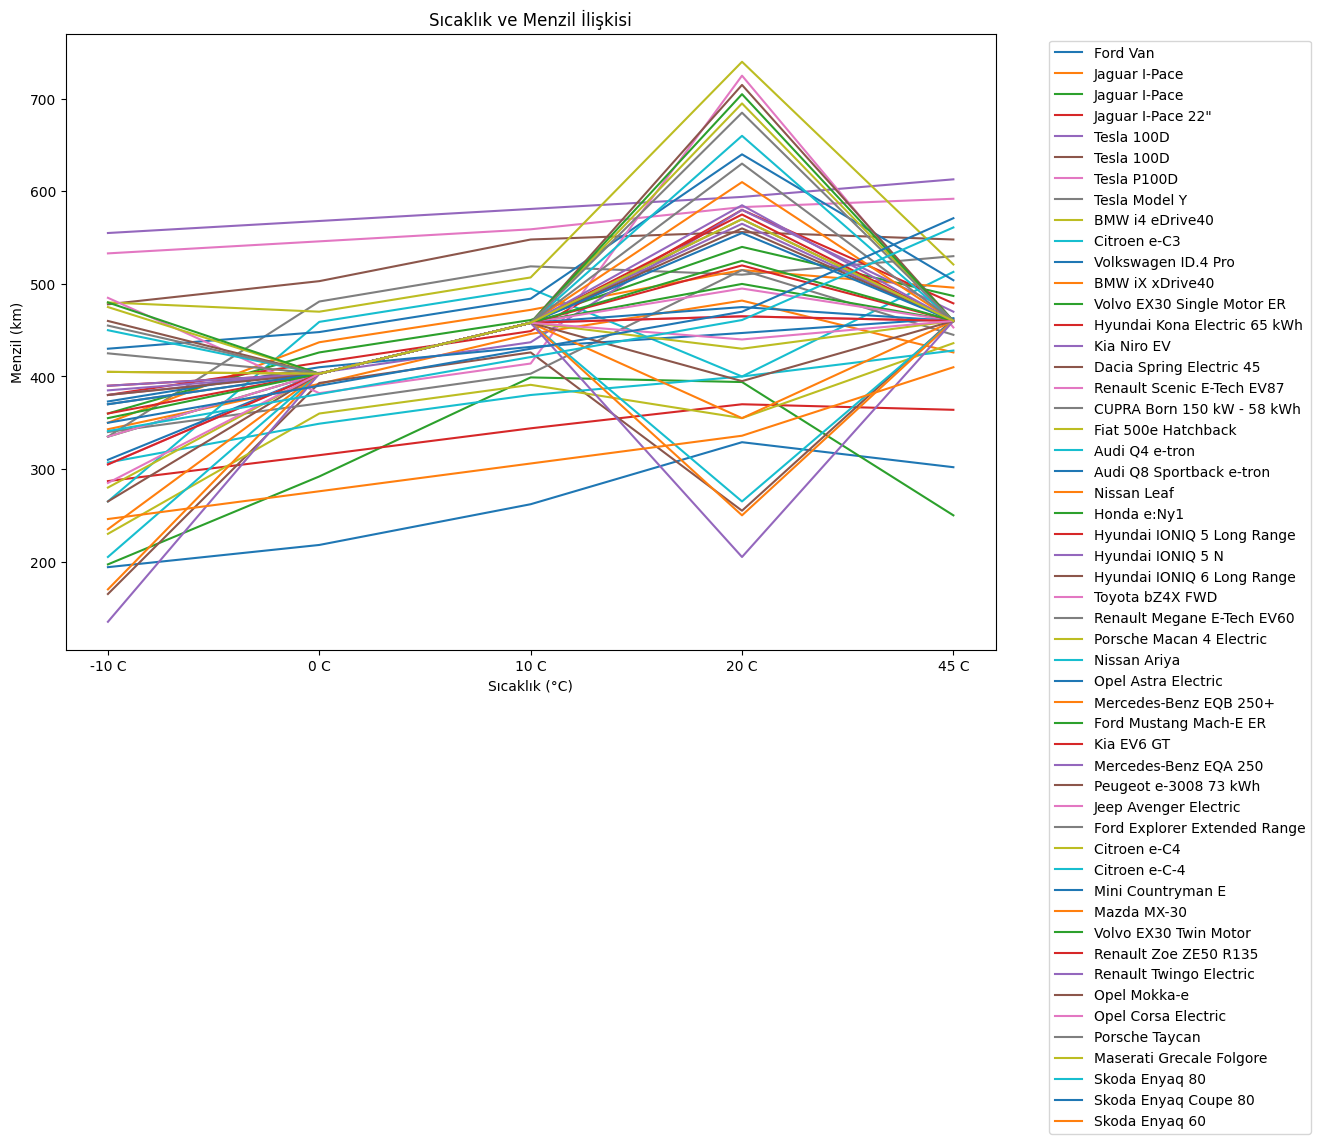

In [13]:
# 2. Line Plot
# Trend between temperature change and vehicle range
temperature_columns = ["-10 C", "0 C", "10 C", "20 C", "45 C"]  # List of temperature columns to plot.

plt.figure(figsize=(12, 8))  # Create a new figure with a size of 12x8 inches.
for vehicle in df["Araç Marka/Model"].unique():  # Loop through each unique vehicle make/model.
    subset = df[df["Araç Marka/Model"] == vehicle]  # Create a subset of the data for this specific vehicle make/model.
    plt.plot(temperature_columns, subset.iloc[0, 4:], label=vehicle)  # Plot the range values for this vehicle across the temperature columns.

plt.title("Sıcaklık ve Menzil İlişkisi")  # Set the title of the plot.
plt.xlabel("Sıcaklık (°C)")  # Label the x-axis as "Temperature (°C)".
plt.ylabel("Menzil (km)")  # Label the y-axis as "Range (km)".
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot to prevent overlap.
plt.show()  # Display the line plot to visualize the relationship between temperature and vehicle range.


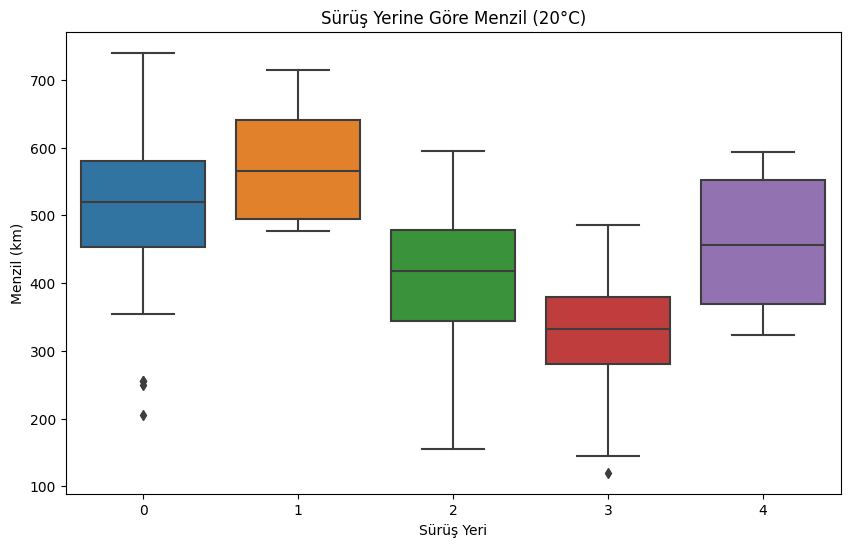

In [14]:
# 3. Box Plot
# Distribution of vehicle range based on different driving locations
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
sns.boxplot(x="Sürüş Yeri", y="20 C", data=df)  # Create a box plot with driving location on the x-axis and vehicle range at 20°C on the y-axis.
# Box plots show the median, quartiles, and potential outliers, providing a comprehensive view of data distribution.

plt.title("Sürüş Yerine Göre Menzil (20°C)")  # Set the title for the box plot.
plt.xlabel("Sürüş Yeri")  # Label the x-axis as "Driving Location".
plt.ylabel("Menzil (km)")  # Label the y-axis as "Range (km)".
plt.show()  # Display the box plot to visualize the distribution of range based on different driving locations.


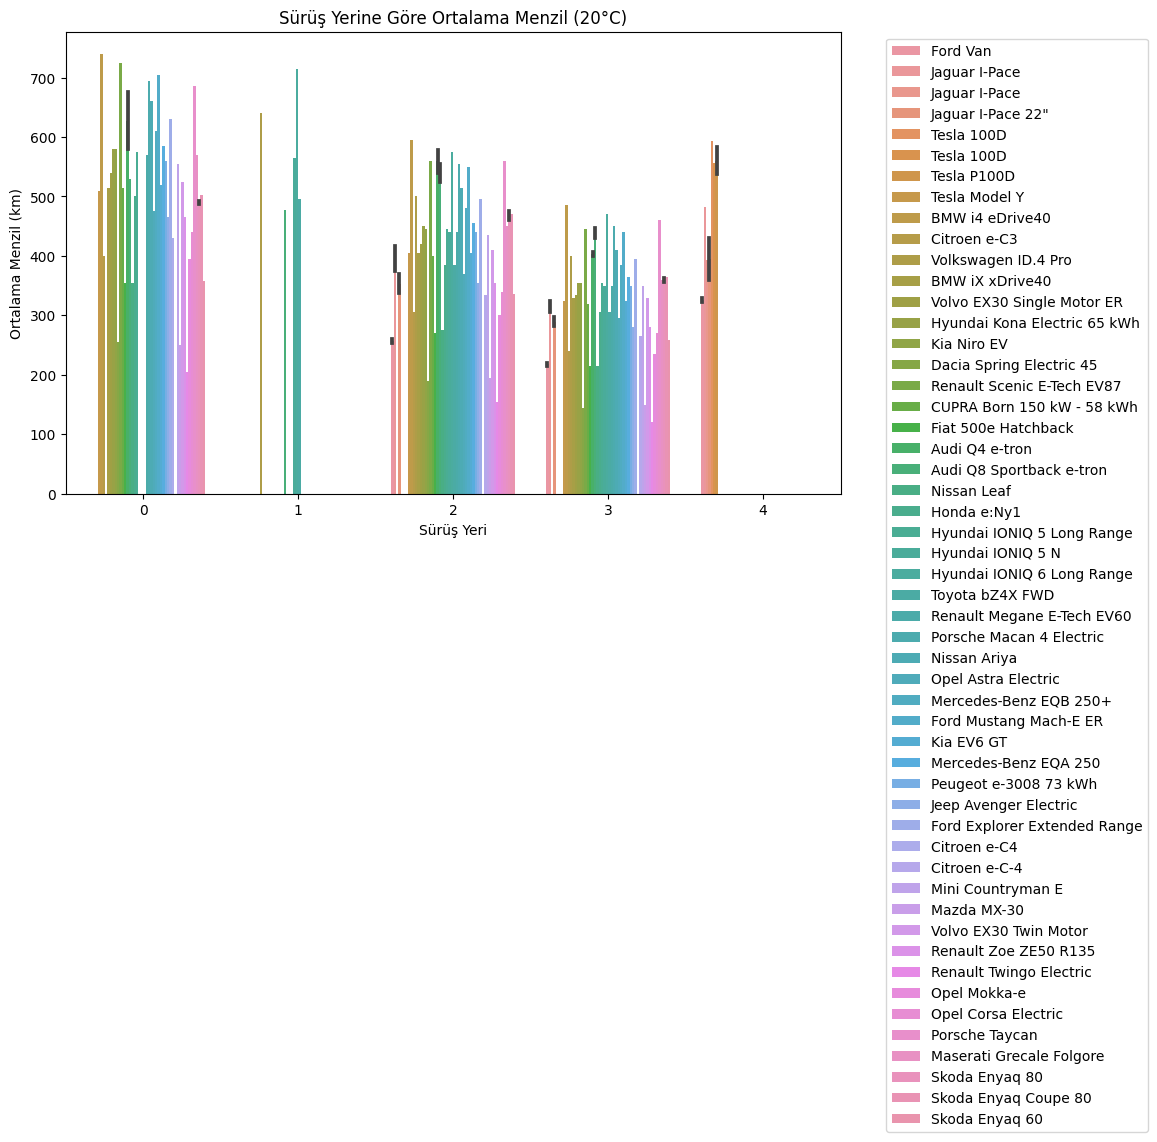

In [15]:
# 4. Bar Plot
# Average range for different driving locations
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
sns.barplot(x="Sürüş Yeri", y="20 C", hue="Araç Marka/Model", data=df)  # Create a bar plot showing the average range at 20°C for each driving location, grouped by car make/model.
# Bar plots are useful for comparing the average values across different categories.

plt.title("Sürüş Yerine Göre Ortalama Menzil (20°C)")  # Set the title for the bar plot.
plt.xlabel("Sürüş Yeri")  # Label the x-axis as "Driving Location".
plt.ylabel("Ortalama Menzil (km)")  # Label the y-axis as "Average Range (km)".
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot to prevent overlap.
plt.show()  # Display the bar plot to visualize the average range for different driving locations, grouped by car make/model.


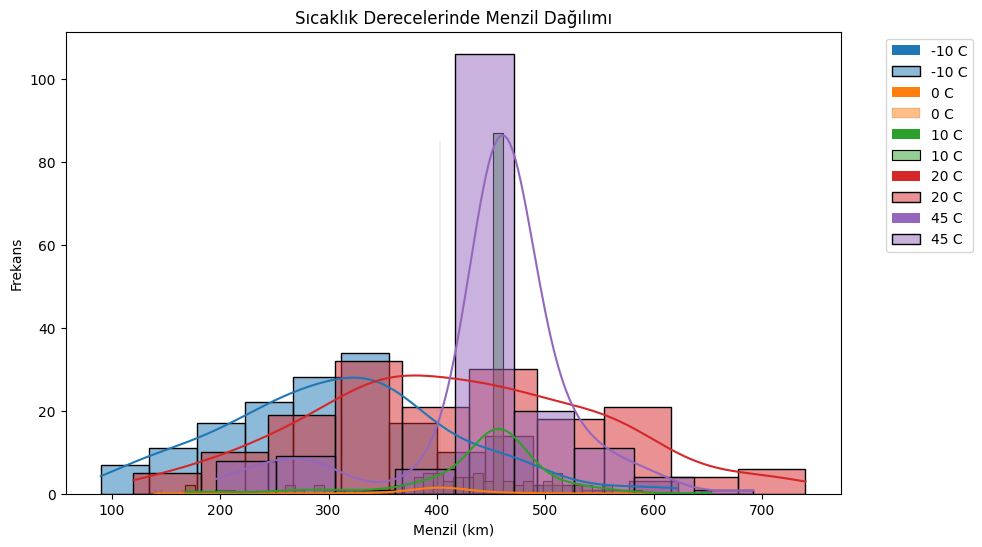

In [16]:
# Distribution of range at different temperatures
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
for temp_col in temperature_columns:  # Loop through each temperature column.
    sns.histplot(df[temp_col], kde=True, label=temp_col)  # Create a histogram with a Kernel Density Estimate (KDE) overlay for each temperature, and label it.
# Histograms with KDE show the distribution of data, with the KDE providing a smooth estimate of the data's density.

plt.title("Sıcaklık Derecelerinde Menzil Dağılımı")  # Set the title for the plot.
plt.xlabel("Menzil (km)")  # Label the x-axis as "Range (km)".
plt.ylabel("Frekans")  # Label the y-axis as "Frequency".
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot to avoid overlap.
plt.show()  # Display the histogram to visualize the distribution of range across different temperature degrees.


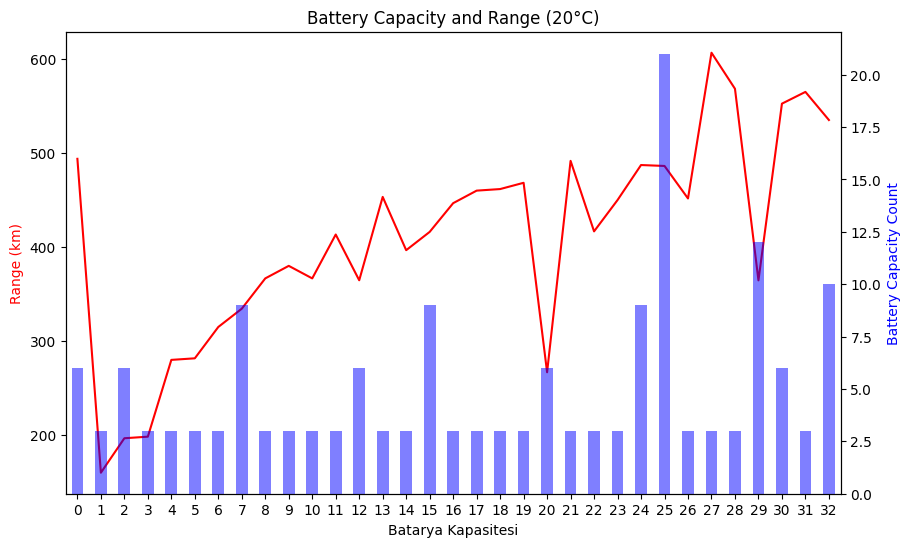

In [17]:
# Plot of range based on battery capacity and temperature
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
ax = plt.gca()  # Get the current axis for the plot.

# Plot the average range at 20°C based on battery capacity
df.groupby("Batarya Kapasitesi")["20 C"].mean().plot(kind='line', color='r', ax=ax, label='Average Range (20°C)')  # Plot the line graph of average range at 20°C.
ax.set_ylabel('Range (km)', color='r')  # Set the y-axis label and color for the first axis.

ax2 = ax.twinx()  # Create a secondary y-axis for plotting.
# Plot the count of battery capacities
df.groupby("Batarya Kapasitesi")["Batarya Kapasitesi"].count().plot(kind='bar', color='b', ax=ax2, alpha=0.5, label='Battery Capacity Count')  # Plot a bar graph for the count of battery capacities.
ax2.set_ylabel('Battery Capacity Count', color='b')  # Set the y-axis label and color for the second axis.

plt.title("Battery Capacity and Range (20°C)")  # Set the title for the plot.
plt.show()  # Display the plot to visualize the relationship between battery capacity and range at 20°C, with the count of battery capacities on the secondary axis.


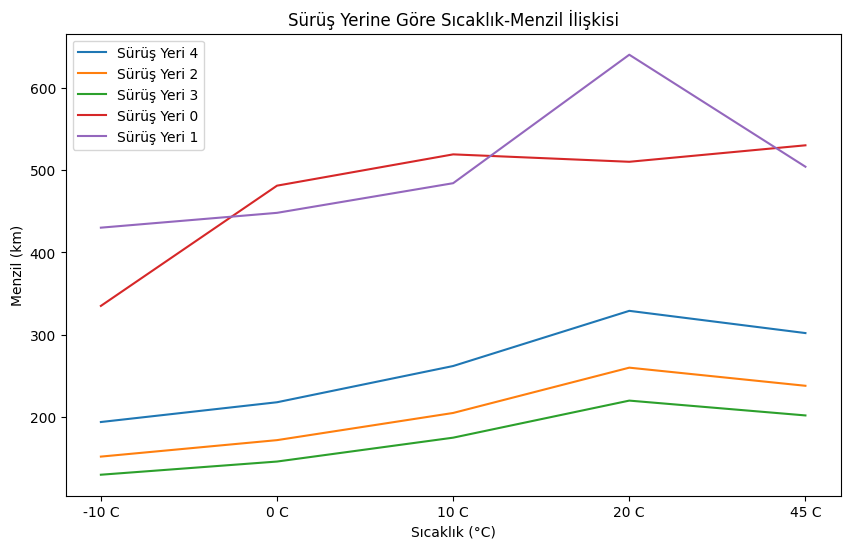

In [18]:
# Variation of range with temperature in different driving locations
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.

for place in df["Sürüş Yeri"].unique():  # Loop through each unique driving location.
    subset = df[df["Sürüş Yeri"] == place]  # Create a subset of the data for this driving location.
    plt.plot(["-10 C", "0 C", "10 C", "20 C", "45 C"], subset.iloc[0, 4:], label=f"Sürüş Yeri {place}")  # Plot the range values at different temperatures for this driving location.

plt.title("Sürüş Yerine Göre Sıcaklık-Menzil İlişkisi")  # Set the title for the plot.
plt.xlabel("Sıcaklık (°C)")  # Label the x-axis as "Temperature (°C)".
plt.ylabel("Menzil (km)")  # Label the y-axis as "Range (km)".
plt.legend()  # Add a legend to identify the lines for different driving locations.
plt.show()  # Display the plot to visualize the relationship between temperature and range for different driving locations.


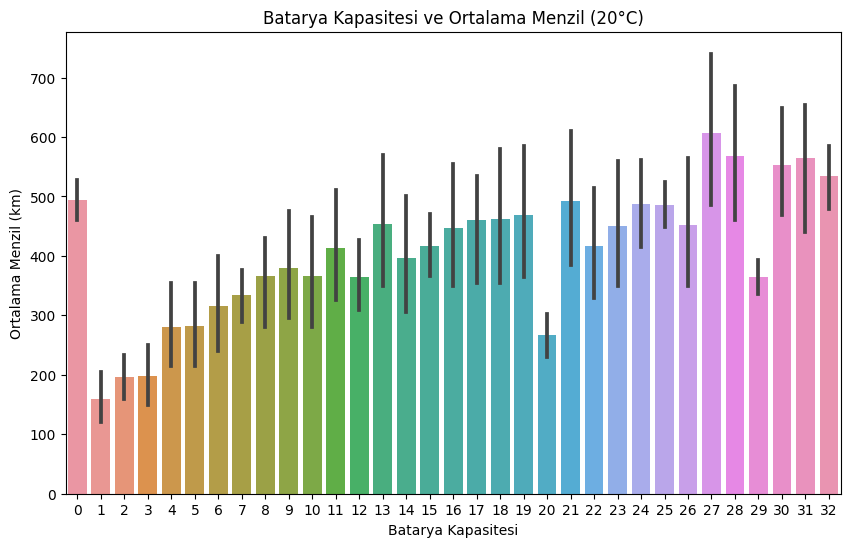

In [19]:
# Average range based on battery capacity
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
sns.barplot(x="Batarya Kapasitesi", y="20 C", data=df)  # Create a bar plot showing the average range at 20°C for each battery capacity.
# Bar plots are useful for comparing average values across different categories, in this case, across different battery capacities.

plt.title("Batarya Kapasitesi ve Ortalama Menzil (20°C)")  # Set the title for the bar plot.
plt.xlabel("Batarya Kapasitesi")  # Label the x-axis as "Battery Capacity".
plt.ylabel("Ortalama Menzil (km)")  # Label the y-axis as "Average Range (km)".
plt.show()  # Display the bar plot to visualize the average range for different battery capacities.


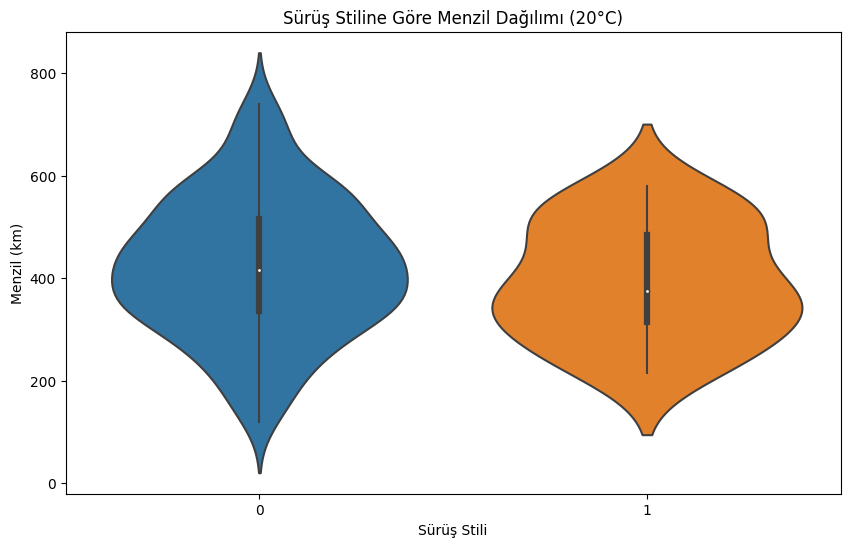

In [20]:
# Distribution of range based on different driving styles
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches.
sns.violinplot(x="Sürüş Stili", y="20 C", data=df)  # Create a violin plot with driving style on the x-axis and range at 20°C on the y-axis.
# Violin plots show the distribution of data across different categories, including the probability density, which provides more information than box plots.

plt.title("Sürüş Stiline Göre Menzil Dağılımı (20°C)")  # Set the title for the plot.
plt.xlabel("Sürüş Stili")  # Label the x-axis as "Driving Style".
plt.ylabel("Menzil (km)")  # Label the y-axis as "Range (km)".
plt.show()  # Display the violin plot to visualize the distribution of range based on different driving styles at 20°C.


In [50]:
# Clean excess whitespace from all string-based columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Removes leading and trailing whitespace from string columns

# Check for null or NaN values across all columns
df.isnull().sum()  # Displays the count of missing values in each column to identify potential data issues

# Fill invalid or missing values with the last valid entry
df.fillna(method='ffill', inplace=True)  # Fills missing values with the most recent valid entry (forward-fill)
print(df.dtypes)  # Prints the data types of all columns to ensure data consistency


Arac Modeli             int32
Batarya Kapasitesi    float64
Surus Yeri              int32
Surus Stili             int32
-10 C                   int64
0 C                     int64
10 C                    int64
20 C                    int64
45 C                    int64
dtype: object


In [51]:
# Check unique values in "Batarya Kapasitesi" column
print(df["Batarya Kapasitesi"].unique())  # Shows unique values in "Batarya Kapasitesi" to identify any data anomalies or variations

[ 67.    84.7   95.    57.5   80.7   44.    77.    71.    64.    65.4
  64.8   25.    87.    58.    37.3  106.    39.    61.9   74.    80.
  60.    50.8   70.5   91.    66.5   73.    50.08  46.3   64.7   30.
  52.    21.3   82.3 ]


In [60]:
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations and array handling
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding categorical data and scaling numerical data
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor for ensemble learning
import warnings  # Library for managing warnings in Python
warnings.filterwarnings("ignore")  # Suppress warnings to keep the output clean and uncluttered

# Load the Excel file and set column names for easier reference
df = pd.read_excel("bitirme.xlsx")  # Load the data from the Excel file named "bitirme.xlsx"
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Rename columns for clarity and easier interpretation

# Clean extra whitespace from all string columns and remove units from numerical data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Remove leading/trailing whitespace from string columns
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Remove "kWh" and convert the battery capacity to a float

# Create LabelEncoders and transform categorical columns into numeric values
label_encoder_arac = LabelEncoder()  # Create a LabelEncoder instance for vehicle models
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Encode "Arac Modeli" into numerical values

label_encoder_yer = LabelEncoder()  # Create a LabelEncoder instance for driving locations
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Encode "Surus Yeri" into numerical values

label_encoder_stil = LabelEncoder()  # Create a LabelEncoder instance for driving styles
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Encode "Surus Stili" into numerical values


In [52]:
# Check again for null or NaN values after filling missing data
df.isnull().sum()  # Confirms whether there are still missing values after filling

# If there are still missing values, fill them with the last valid data again
df.fillna(method='ffill', inplace=True)  # Forward-fill any remaining missing values


[ 67.    84.7   95.    57.5   80.7   44.    77.    71.    64.    65.4
  64.8   25.    87.    58.    37.3  106.    39.    61.9   74.    80.
  60.    50.8   70.5   91.    66.5   73.    50.08  46.3   64.7   30.
  52.    21.3   82.3 ]


In [53]:
# Check unique values in "Arac Modeli" column
print(df["Arac Modeli"].unique())  # Shows unique encoded values for "Arac Modeli" to ensure proper LabelEncoder encoding


[12 18 19 43 45 44  2  6 47  3 48 17 22  8 37  4  9  0  1 29 13 14 15 16
 46 36 34 28 30 26 11 21 25 33 20 10  7  5 27 24 49 39 38 32 31 35 23 41
 42 40]


In [54]:
# Check unique values in "Surus Yeri" column
print(df["Surus Yeri"].unique())  # Displays unique encoded values for "Surus Yeri" to ensure no inconsistencies


[3 1 2 0]


In [55]:
print(df["Batarya Kapasitesi"].unique())  # Re-check unique values in "Batarya Kapasitesi" to confirm consistent data


[ 67.    84.7   95.    57.5   80.7   44.    77.    71.    64.    65.4
  64.8   25.    87.    58.    37.3  106.    39.    61.9   74.    80.
  60.    50.8   70.5   91.    66.5   73.    50.08  46.3   64.7   30.
  52.    21.3   82.3 ]


In [56]:
# Clean excess whitespace again after potential corrections or transformations
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Re-clean the string columns to remove excess whitespace


In [57]:
# Final check for null or NaN values after cleaning and filling
df.isnull().sum()  # Displays count of missing values to ensure no data is lost


Arac Modeli           0
Batarya Kapasitesi    0
Surus Yeri            0
Surus Stili           0
-10 C                 0
0 C                   0
10 C                  0
20 C                  0
45 C                  0
dtype: int64

In [58]:
# Fill any remaining invalid or missing data
df.fillna(method='ffill', inplace=True)  # Use forward-fill to fill in any remaining missing data


In [59]:
# Print data types to ensure they are correct and consistent
print(df.dtypes)  # Shows the data types of all columns to confirm expected types

Arac Modeli             int32
Batarya Kapasitesi    float64
Surus Yeri              int32
Surus Stili             int32
-10 C                   int64
0 C                     int64
10 C                    int64
20 C                    int64
45 C                    int64
dtype: object


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load an Excel file and set column names for easier interpretation
df = pd.read_excel("bitirme.xlsx")  # Load data from "bitirme.xlsx"
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Assign column names for better readability

# Clean extra spaces from string columns and remove units from numerical columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Strip leading and trailing whitespace
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Convert "Batarya Kapasitesi" to float after removing "kWh"

# Encode categorical columns into numeric values using LabelEncoder
label_encoder_arac = LabelEncoder()  # Create a LabelEncoder for vehicle models
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Encode "Arac Modeli" into numeric values

label_encoder_yer = LabelEncoder()  # Create a LabelEncoder for driving locations
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Encode "Surus Yeri" into numeric values

label_encoder_stil = LabelEncoder()  # Create a LabelEncoder for driving styles
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Encode "Surus Stili" into numeric values

# Extract features and target variable for model training
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  # Features for prediction
y = df["45 C"]  # Target variable representing range at 45 degrees Celsius

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% test, 80% training, consistent random seed for reproducibility

# Standardize the data to ensure uniform scaling across all features
scaler = StandardScaler()  # Create a StandardScaler for feature scaling
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data with the same scaler (avoids data leakage)

# Define various machine learning algorithms to be used
models = {
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Define a function to predict the range at 45 degrees Celsius based on user input
def tahmin_45(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil):
    # Get user input and encode it into numeric values
    arac_modeli = label_encoder_arac.transform([input("Araç marka/modelini girin: ")])[0]  # Encode vehicle model input
    batarya_kapasitesi = float(input("Batarya kapasitesini girin (kWh): "))  # Get battery capacity from the user
    surus_yeri = label_encoder_yer.transform([input("Sürüş yeri bilgisini girin (ör. Urban, Motorway, Combined): ")])[0]  # Encode driving location
    surus_stili = label_encoder_stil.transform([input("Sürüş stili bilgisini girin (ör. AC kapalı, AC/Heating): ")])[0]  # Encode driving style
    
    # Additional temperature-based range input from the user
    minus_10 = float(input("-10°C için menzili girin (km): "))  # Range at -10 degrees Celsius
    zero = float(input("0°C için menzili girin (km): "))  # Range at 0 degrees Celsius
    plus_10 = float(input("10°C için menzili girin (km): "))  # Range at 10 degrees Celsius
    plus_20 = float(input("20°C için menzili girin (km): "))  # Range at 20 degrees Celsius
    
    # Create a new data row with the encoded user input
    X_new = pd.DataFrame({
        "Arac Modeli": [arac_modeli],  # Encoded vehicle model
        "Batarya Kapasitesi": [batarya_kapasitesi],  # Battery capacity in kWh
        "Surus Yeri": [surus_yeri],  # Encoded driving location
        "Surus Stili": [surus_stili],  # Encoded driving style
    })

    # Scale the new data using the previously fitted scaler
    X_new_scaled = scaler.transform(X_new)  # Apply the scaler to the new data
    
    return X_new_scaled  # Return the scaled data for prediction

# Predict the range at 45 degrees Celsius and measure model accuracy
X_new_scaled = tahmin_45(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil)  # Get new scaled data from user input

results = {}  # Dictionary to store predictions for each model
metrics = {}  # Dictionary to store evaluation metrics for each model

# Train models and make predictions for each one
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model with scaled training data
    
    y_pred = model.predict(X_new_scaled)  # Make predictions with the new user input
    results[name] = y_pred[0]  # Store the predicted range for each model
    
    # Make predictions with the test set and measure accuracy
    y_test_pred = model.predict(X_test_scaled)  # Predict on the test set to evaluate the model
    
    mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error to measure accuracy
    r2 = r2_score(y_test, y_test_pred)  # Calculate R-squared to measure how much variance is explained by the model
    
    metrics[name] = {"MSE": mse, "R²": r2}  # Store performance metrics for each model
    
    # Print the predicted range and model accuracy for each algorithm
    print(f"{name} ile 45°C için tahmini menzil: {results[name]:.2f} km")  # Output the predicted range at 45 degrees Celsius
    print(f"{name} doğruluk ölçümleri - MSE: {metrics[name]['MSE']:.2f}, R²: {metrics[name]['R²']:.2f}")  # Output MSE and R-squared for each model's accuracy


KNN ile 45°C için tahmini menzil: 456.40 km
KNN doğruluk ölçümleri - MSE: 4864.99, R²: 0.24
SVM ile 45°C için tahmini menzil: 459.42 km
SVM doğruluk ölçümleri - MSE: 6273.15, R²: 0.02
Linear Regression ile 45°C için tahmini menzil: 418.01 km
Linear Regression doğruluk ölçümleri - MSE: 5861.32, R²: 0.08
Decision Tree ile 45°C için tahmini menzil: 460.00 km
Decision Tree doğruluk ölçümleri - MSE: 6395.00, R²: -0.00
Random Forest ile 45°C için tahmini menzil: 442.56 km
Random Forest doğruluk ölçümleri - MSE: 2652.85, R²: 0.58


In [43]:
import pandas as pd  # Library for data analysis and manipulation
import numpy as np  # Library for numerical operations and array handling
from sklearn.model_selection import train_test_split  # Utility for splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding categorical data and scaling numerical data
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluating regression models
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors algorithm for regression
from sklearn.svm import SVR  # Support Vector Machine for regression
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.tree import DecisionTreeRegressor  # Decision tree-based regression
from sklearn.ensemble import RandomForestRegressor  # Ensemble-based regression with multiple decision trees
import warnings  # Library for managing warnings in Python
warnings.filterwarnings("ignore")  # Suppress warnings to avoid cluttering the output

# Load the Excel file and set column names for better clarity
df = pd.read_excel("bitirme.xlsx")  # Read data from the "bitirme.xlsx" Excel file
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Set column names for easier reference

# Clean extra spaces and remove units from numerical columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Trim whitespace from string columns
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Remove "kWh" and convert to float

# Convert categorical columns to numeric using LabelEncoder
label_encoder_arac = LabelEncoder()  # Create a LabelEncoder for "Arac Modeli"
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Encode vehicle models into numbers

label_encoder_yer = LabelEncoder()  # Create a LabelEncoder for "Surus Yeri"
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Encode driving locations into numbers

label_encoder_stil = LabelEncoder()  # Create a LabelEncoder for "Surus Stili"
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Encode driving styles into numbers

# Extract features and the target variable for model training
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  # Features for prediction
y = df["20 C"]  # Target variable representing range at 20 degrees Celsius

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

# Standardize the features to ensure uniform scaling
scaler = StandardScaler()  # Create a StandardScaler instance for scaling data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler (to avoid data leakage)

# Define various machine learning models for regression
models = {
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Function to predict the range at 20 degrees Celsius based on user input
def tahmin_20(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil):
    # Collect user input and encode it to numeric values
    arac_modeli = label_encoder_arac.transform([input("Araç marka/modelini girin: ")])[0]  # Encode vehicle model input
    batarya_kapasitesi = float(input("Batarya kapasitesini girin (kWh): "))  # Get battery capacity from the user
    surus_yeri = label_encoder_yer.transform([input("Sürüş yeri bilgisini girin (ör. Urban, Motorway, Combined): ")])[0]  # Encode driving location
    surus_stili = label_encoder_stil.transform([input("Sürüş stili bilgisini girin (ör. AC kapalı, AC/Heating): ")])[0]  # Encode driving style
    minus_10 = float(input("-10°C için menzili girin (km): "))  # Range at -10 degrees Celsius
    zero = float(input("0°C için menzili girin (km): "))  # Range at 0 degrees Celsius
    plus_10 = float(input("10°C için menzili girin (km): "))  # Range at 10 degrees Celsius
    plus_45 = float(input("45°C için menzili girin (km): "))  # Range at 45 degrees Celsius

    # Create a new data row with the encoded user input
    X_new = pd.DataFrame({
        "Arac Modeli": [arac_modeli],  # Encoded vehicle model
        "Batarya Kapasitesi": [batarya_kapasitesi],  # Battery capacity in kWh
        "Surus Yeri": [surus_yeri],  # Encoded driving location
        "Surus Stili": [surus_stili]  # Encoded driving style
    })

    # Scale the new data using the previously fitted scaler
    X_new_scaled = scaler.transform(X_new)  # Apply the scaler to the new data

    return X_new_scaled  # Return the scaled data for prediction

# Predict the range at 20 degrees Celsius and evaluate model accuracy
X_new_scaled = tahmin_20(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil)  # Get new scaled data based on user input

results = {}  # Dictionary to store predictions for each model
metrics = {}  # Dictionary to store evaluation metrics for each model

# Train models and make predictions for each one
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model with scaled training data
    
    y_pred = model.predict(X_new_scaled)  # Make a prediction with the new data
    results[name] = y_pred[0]  # Store the predicted range for each model
    
    # Make predictions with the test set and measure accuracy
    y_test_pred = model.predict(X_test_scaled)  # Predict on the test set to evaluate model accuracy
    
    mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error to measure prediction accuracy
    r2 = r2_score(y_test, y_test_pred)  # Calculate R-squared to measure explained variance
    
    metrics[name] = {"MSE": mse, "R²": r2}  # Store evaluation metrics for each model
    
    # Print the predicted range and accuracy metrics for each model
    print(f"{name} ile 20°C için tahmini menzil: {results[name]:.2f} km")  # Output the predicted range at 20 degrees Celsius
    print(f"{name} doğruluk ölçümleri - MSE: {metrics[name]['MSE']:.2f}, R²: {metrics[name]['R²']:.2f}")  # Output the MSE and R-squared for each model's accuracy


KNN ile 20°C için tahmini menzil: 263.00 km
KNN doğruluk ölçümleri - MSE: 4956.98, R²: 0.75
SVM ile 20°C için tahmini menzil: 397.86 km
SVM doğruluk ölçümleri - MSE: 18094.36, R²: 0.10
Linear Regression ile 20°C için tahmini menzil: 172.06 km
Linear Regression doğruluk ölçümleri - MSE: 5679.11, R²: 0.72
Decision Tree ile 20°C için tahmini menzil: 265.00 km
Decision Tree doğruluk ölçümleri - MSE: 6451.94, R²: 0.68
Random Forest ile 20°C için tahmini menzil: 267.73 km
Random Forest doğruluk ölçümleri - MSE: 3380.55, R²: 0.83


In [41]:
import pandas as pd  # Pandas library for data manipulation and analysis
import numpy as np  # Numpy library for numerical computations and array operations
from sklearn.model_selection import train_test_split  # Function to split dataset into training and test subsets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding categorical data and scaling numerical data
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluating regression model performance
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors algorithm for regression
from sklearn.svm import SVR  # Support Vector Regression algorithm
from sklearn.linear_model import LinearRegression  # Linear Regression algorithm
from sklearn.tree import DecisionTreeRegressor  # Decision Tree algorithm for regression
from sklearn.ensemble import RandomForestRegressor  # Ensemble-based regression with multiple decision trees
import warnings  # Library for handling warnings in code
warnings.filterwarnings("ignore")  # Suppress warnings to keep the output clean

# Load an Excel file and set the column names for better readability
df = pd.read_excel("bitirme.xlsx")  # Load data from the Excel file "bitirme.xlsx"
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Rename columns for better understanding

# Clean extra spaces and remove units from numerical columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Remove leading and trailing spaces from strings
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Convert 'Batarya Kapasitesi' to float after removing "kWh"

# Encode categorical columns using LabelEncoder to convert text labels to numeric values
label_encoder_arac = LabelEncoder()  # Initialize a LabelEncoder for vehicle models
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Encode 'Arac Modeli' to integers

label_encoder_yer = LabelEncoder()  # Initialize a LabelEncoder for driving locations
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Encode 'Surus Yeri' into integers

label_encoder_stil = LabelEncoder()  # Initialize a LabelEncoder for driving styles
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Encode 'Surus Stili' into integers

# Prepare features and target variable for model training
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  # Select the features for the model
y = df["10 C"]  # The target variable, indicating range at 10 degrees Celsius

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Use 80% for training, 20% for testing

# Standardize the data to ensure consistent scaling across all features
scaler = StandardScaler()  # Initialize a StandardScaler for scaling data
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data with the same scaler (no fitting to avoid data leakage)

# Define machine learning models for regression
models = {
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors algorithm for regression
    "SVM": SVR(),  # Support Vector Regression
    "Linear Regression": LinearRegression(),  # Linear Regression algorithm
    "Decision Tree": DecisionTreeRegressor(),  # Decision Tree-based regression
    "Random Forest": RandomForestRegressor(n_estimators=100)  # Random Forest with 100 trees
}

# Function to predict range at 10 degrees Celsius using user input
def tahmin_10(scaler):
    # Get user input and encode it into numeric values
    arac_modeli = label_encoder_arac.transform([input("Araç marka/modelini girin: ")])[0]  # Encode vehicle model input
    batarya_kapasitesi = float(input("Batarya kapasitesini girin (kWh): "))  # Get battery capacity from user
    surus_yeri = label_encoder_yer.transform([input("Sürüş yeri bilgisini girin (ör. Urban, Motorway, Combined): ")])[0]  # Encode driving location input
    surus_stili = label_encoder_stil.transform([input("Sürüş stili bilgisini girin (ör. AC kapalı, AC/Heating): ")])[0]  # Encode driving style input
    
    # Get additional temperature-based range information from the user
    minus_10 = float(input("-10°C için menzili girin (km): "))  # Get range at -10 degrees Celsius
    zero = float(input("0°C için menzili girin (km): "))  # Get range at 0 degrees Celsius
    plus_20 = float(input("20°C için menzili girin (km): "))  # Get range at 20 degrees Celsius
    plus_45 = float(input("45°C için menzili girin (km): "))  # Get range at 45 degrees Celsius
    
    # Create a new data row with the encoded user input
    X_new = pd.DataFrame({
        "Arac Modeli": [arac_modeli],  # Encoded vehicle model
        "Batarya Kapasitesi": [batarya_kapasitesi],  # Battery capacity
        "Surus Yeri": [surus_yeri],  # Encoded driving location
        "Surus Stili": [surus_stili]  # Encoded driving style
    })

    # Scale the new data using the same scaler as the training set
    X_new_scaled = scaler.transform(X_new)  # Scale the new input
    
    return X_new_scaled  # Return the scaled data for prediction

# Predict the range at 10 degrees Celsius and measure model accuracy
X_new_scaled = tahmin_10(scaler)  # Get the new scaled data for prediction

results = {}  # Dictionary to store predictions for each model
metrics = {}  # Dictionary to store model performance metrics

# Train models and make predictions for each one
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model on scaled training data
    
    y_pred = model.predict(X_new_scaled)  # Make a prediction with the new data
    results[name] = y_pred[0]  # Store the predicted range for each model
    
    # Make predictions with the test set and measure accuracy
    y_test_pred = model.predict(X_test_scaled)  # Predict on the test set to evaluate the model
    
    mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error to assess model accuracy
    r2 = r2_score(y_test, y_test_pred)  # Calculate R-squared to measure explained variance
    
    metrics[name] = {"MSE": mse, "R²": r2}  # Store accuracy metrics for each model
    
    # Print the predicted range and accuracy metrics for each model
    print(f"{name} ile 10°C için tahmini menzil: {results[name]:.2f} km")  # Output the predicted range at 10 degrees Celsius
    print(f"{name} doğruluk ölçümleri - MSE: {metrics[name]['MSE']:.2f}, R²: {metrics[name]['R²']:.2f}")  # Output MSE and R-squared for model evaluation


KNN ile 10°C için tahmini menzil: 465.60 km
KNN doğruluk ölçümleri - MSE: 3458.12, R²: 0.08
SVM ile 10°C için tahmini menzil: 456.42 km
SVM doğruluk ölçümleri - MSE: 3701.29, R²: 0.02
Linear Regression ile 10°C için tahmini menzil: 731.16 km
Linear Regression doğruluk ölçümleri - MSE: 4015.26, R²: -0.07
Decision Tree ile 10°C için tahmini menzil: 458.00 km
Decision Tree doğruluk ölçümleri - MSE: 2668.18, R²: 0.29
Random Forest ile 10°C için tahmini menzil: 441.07 km
Random Forest doğruluk ölçümleri - MSE: 1606.89, R²: 0.57


In [40]:
import pandas as pd  # Library for working with structured data (dataframes)
import numpy as np  # Library for numerical operations and data manipulation
from sklearn.model_selection import train_test_split  # Function for splitting data into training and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding categorical data and scaling numerical data
from sklearn.metrics import mean_squared_error, r2_score  # Functions for measuring model performance in regression
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors algorithm for regression
from sklearn.svm import SVR  # Support Vector Regression algorithm
from sklearn.linear_model import LinearRegression  # Linear Regression algorithm
from sklearn.tree import DecisionTreeRegressor  # Decision Tree algorithm for regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest algorithm with multiple Decision Trees
import warnings  # Library for handling and suppressing warnings
warnings.filterwarnings("ignore")  # Suppress all warnings to avoid clutter in the output

# Load an Excel file into a Pandas DataFrame and set the column names for easier referencing
df = pd.read_excel("bitirme.xlsx")  # Load data from the "bitirme.xlsx" Excel file
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]  # Set column names to meaningful descriptions

# Clean up extra spaces from strings and remove units from numerical data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Trim white spaces from text columns
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Convert 'Batarya Kapasitesi' to float after removing "kWh" unit

# Encode categorical data into numeric values using LabelEncoder
label_encoder_arac = LabelEncoder()  # Create a LabelEncoder instance for "Arac Modeli"
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Convert vehicle models to encoded integers

label_encoder_yer = LabelEncoder()  # Create a LabelEncoder instance for "Surus Yeri"
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Convert driving locations to encoded integers

label_encoder_stil = LabelEncoder()  # Create a LabelEncoder instance for "Surus Stili"
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Convert driving styles to encoded integers

# Extract features and the target variable for the model
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  # Define features for the model
y = df["0 C"]  # Define target variable (range at 0 degrees Celsius)

# Split data into training and test sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data with 80% training and 20% test, keeping a consistent random state for reproducibility

# Standardize the feature data to have zero mean and unit variance
scaler = StandardScaler()  # Initialize a StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler to avoid data leakage

# Define a function to take user input, encode it, and scale it for model prediction
def tahmin_0(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil):
    # Get user input and encode categorical data
    arac_modeli = label_encoder_arac.transform([input("Araç marka/modelini girin: ")])[0]  # Encode vehicle model
    batarya_kapasitesi = float(input("Batarya kapasitesini girin (kWh): "))  # Get battery capacity from user
    surus_yeri = label_encoder_yer.transform([input("Sürüş yeri bilgisini girin (ör. Urban, Motorway, Combined): ")])[0]  # Encode driving location
    surus_stili = label_encoder_stil.transform([input("Sürüş stili bilgisini girin (ör. AC kapalı, AC/Heating): ")])[0]  # Encode driving style

    # Get additional temperature-based range data from the user
    minus_10 = float(input("-10°C için menzili girin (km): "))  # Get range at -10 degrees Celsius
    plus_10 = float(input("10°C için menzili girin (km): "))  # Get range at 10 degrees Celsius
    plus_20 = float(input("20°C için menzili girin (km): "))  # Get range at 20 degrees Celsius
    plus_45 = float(input("45°C için menzili girin (km): "))  # Get range at 45 degrees Celsius

    # Create a new data row with the encoded user input
    X_new = pd.DataFrame({
        "Arac Modeli": [arac_modeli],  # Encoded vehicle model
        "Batarya Kapasitesi": [batarya_kapasitesi],  # Battery capacity
        "Surus Yeri": [surus_yeri],  # Encoded driving location
        "Surus Stili": [surus_stili]  # Encoded driving style
    })

    # Scale the new data using the same scaler used for the training set
    X_new_scaled = scaler.transform(X_new)  # Apply the scaler to the new data

    return X_new_scaled  # Return the scaled data for prediction

# Use the defined models to predict the range at 0 degrees Celsius and measure accuracy
X_new_scaled = tahmin_0(scaler, label_encoder_arac, label_encoder_yer, label_encoder_stil)  # Get new scaled user input for prediction

# Define a set of machine learning models to evaluate
models = {
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors algorithm
    "SVM": SVR(),  # Support Vector Regression
    "Linear Regression": LinearRegression(),  # Linear regression algorithm
    "Decision Tree": DecisionTreeRegressor(),  # Decision Tree for regression
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

results = {}  # Dictionary to store predictions for each model
metrics = {}  # Dictionary to store model performance metrics

# Loop through each model to train, predict, and measure accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model with scaled training data
    
    y_pred = model.predict(X_new_scaled)  # Make prediction with the new user input
    results[name] = y_pred[0]  # Store the predicted range for the specific model
    
    y_test_pred = model.predict(X_test_scaled)  # Predict on the test data to evaluate model accuracy
    
    mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error to assess model accuracy
    r2 = r2_score(y_test, y_test_pred)  # Calculate R-squared to measure how much variance the model explains
    
    metrics[name] = {"MSE": mse, "R²": r2}  # Store accuracy metrics for each model
    
    # Print the predicted range and model accuracy for each algorithm
    print(f"{name} ile 0°C için tahmini menzil: {results[name]:.2f} km")  # Output the predicted range at 0 degrees Celsius
    print(f"{name} doğruluk ölçümleri - MSE: {metrics[name]['MSE']:.2f}, R²: {metrics[name]['R²']:.2f}")  # Output the MSE and R-squared for each model


KNN ile 0°C için tahmini menzil: 430.20 km
KNN doğruluk ölçümleri - MSE: 3009.37, R²: 0.21
SVM ile 0°C için tahmini menzil: 402.10 km
SVM doğruluk ölçümleri - MSE: 3701.55, R²: 0.03
Linear Regression ile 0°C için tahmini menzil: 648.11 km
Linear Regression doğruluk ölçümleri - MSE: 3824.86, R²: -0.00
Decision Tree ile 0°C için tahmini menzil: 403.00 km
Decision Tree doğruluk ölçümleri - MSE: 526.56, R²: 0.86
Random Forest ile 0°C için tahmini menzil: 398.81 km
Random Forest doğruluk ölçümleri - MSE: 673.36, R²: 0.82


In [38]:
import pandas as pd  # Data processing library for handling dataframes
import numpy as np  # Numerical operations library, useful for arrays and mathematical operations
from sklearn.model_selection import train_test_split  # Utility for splitting dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding categorical data and scaling numerical data
from sklearn.metrics import mean_squared_error, r2_score  # Performance metrics for regression models
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regression algorithm
from sklearn.svm import SVR  # Support Vector Machine regression algorithm
from sklearn.linear_model import LinearRegression  # Linear regression algorithm
from sklearn.tree import DecisionTreeRegressor  # Decision Tree-based regression algorithm
from sklearn.ensemble import RandomForestRegressor  # Ensemble method with multiple Decision Trees for regression
import warnings  # To handle warnings in a more controlled way
warnings.filterwarnings("ignore")  # Ignore warnings, often used to avoid clutter in output during exploratory work

# Load an Excel file into a DataFrame and set the column names for easier reference
df = pd.read_excel("bitirme.xlsx")
df.columns = ["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili", "-10 C", "0 C", "10 C", "20 C", "45 C"]

# Clean up extra spaces and remove units like 'kWh' from data to ensure correct processing
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Remove extra spaces from string data
df["Batarya Kapasitesi"] = df["Batarya Kapasitesi"].str.replace(" kWh", "").astype(float)  # Convert battery capacity to float

# Use LabelEncoder to convert categorical data to numerical format, necessary for ML algorithms
label_encoder_arac = LabelEncoder()
df["Arac Modeli"] = label_encoder_arac.fit_transform(df["Arac Modeli"])  # Encode vehicle models

label_encoder_yer = LabelEncoder()
df["Surus Yeri"] = label_encoder_yer.fit_transform(df["Surus Yeri"])  # Encode driving locations

label_encoder_stil = LabelEncoder()
df["Surus Stili"] = label_encoder_stil.fit_transform(df["Surus Stili"])  # Encode driving styles

# Scale the data for model training, ensuring numerical features are on a similar scale
X = df[["Arac Modeli", "Batarya Kapasitesi", "Surus Yeri", "Surus Stili"]]  # Features for prediction
y = df["-10 C"]  # Target variable representing range at -10 degrees Celsius

# Split the data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for testing, ensuring reproducibility with random_state

scaler = StandardScaler()  # Standardization: sets mean to 0 and standard deviation to 1
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform testing data without fitting (prevents data leakage)

# Define a set of regression algorithms to evaluate
models = {
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors Regressor
    "SVM": SVR(),  # Support Vector Regressor
    "Linear Regression": LinearRegression(),  # Linear Regression
    "Decision Tree": DecisionTreeRegressor(),  # Decision Tree Regressor
    "Random Forest": RandomForestRegressor(n_estimators=100)  # Random Forest with 100 decision trees
}

# Function to create a new data sample and scale it for prediction
def tahmin_minus_10(scaler):
    arac_modeli = label_encoder_arac.transform([input("Araç marka/modelini girin: ")])[0]  # Get user input and encode it
    batarya_kapasitesi = float(input("Batarya kapasitesini girin (kWh): "))  # Get battery capacity
    surus_yeri = label_encoder_yer.transform([input("Sürüş yeri bilgisini girin (ör. Urban, Motorway, Combined): ")])[0]  # Get and encode driving location
    surus_stili = label_encoder_stil.transform([input("Sürüş stili bilgisini girin (ör. AC kapalı, AC/Heating): ")])[0]  # Get and encode driving style
    zero = float(input("0°C için menzili girin (km): "))
    plus_10 = float(input("10°C için menzili girin (km): "))
    plus_20 = float(input("20°C için menzili girin (km): "))
    plus_45 = float(input("45°C için menzili girin (km): "))
    # Create a new row of data based on user input
    X_new = pd.DataFrame({
        "Arac Modeli": [arac_modeli],  # Encoded vehicle model
        "Batarya Kapasitesi": [batarya_kapasitesi],  # Battery capacity
        "Surus Yeri": [surus_yeri],  # Encoded driving location
        "Surus Stili": [surus_stili]  # Encoded driving style
    })
    
    # Scale the new data using the previously fitted scaler
    X_new_scaled = scaler.transform(X_new)  # Apply the scaler to new data
    return X_new_scaled  # Return the scaled data

# Use each model to predict the range at -10 degrees Celsius and measure accuracy
X_new_scaled = tahmin_minus_10(scaler)  # Get a new scaled data point for prediction

results = {}  # Dictionary to store predictions
metrics = {}  # Dictionary to store model evaluation metrics

# Loop through the defined models and evaluate them
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data
    
    y_pred = model.predict(X_new_scaled)  # Predict the range at -10 degrees with the new data
    tahmin = y_pred[0]  # Get the predicted value
    
    y_test_pred = model.predict(X_test_scaled)  # Predict on the test set to evaluate the model
    
    mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error for model performance evaluation
    r2 = r2_score(y_test, y_test_pred)  # Calculate R-squared to measure the proportion of variance explained by the model
    
    results[name] = tahmin  # Store the prediction for each model
    metrics[name] = {"MSE": mse, "R²": r2}  # Store the performance metrics
    
    # Print the predictions and evaluation metrics for each model
    print(f"{name} ile -10°C için tahmini menzil: {results[name]:.2f} km")  # Output the predicted range at -10 degrees Celsius
    print(f"{name} doğruluk ölçümleri - MSE: {metrics[name]['MSE']:.2f}, R²: {metrics[name]['R²']:.2f}")  # Output the model's MSE and R²


KNN ile -10°C için tahmini menzil: 237.00 km
KNN doğruluk ölçümleri - MSE: 3899.55, R²: 0.68
SVM ile -10°C için tahmini menzil: 304.30 km
SVM doğruluk ölçümleri - MSE: 10761.27, R²: 0.11
Linear Regression ile -10°C için tahmini menzil: 171.33 km
Linear Regression doğruluk ölçümleri - MSE: 4379.42, R²: 0.64
Decision Tree ile -10°C için tahmini menzil: 250.00 km
Decision Tree doğruluk ölçümleri - MSE: 5845.62, R²: 0.51
Random Forest ile -10°C için tahmini menzil: 241.59 km
Random Forest doğruluk ölçümleri - MSE: 3569.96, R²: 0.70
